<a href="https://colab.research.google.com/github/shardulchavan/Crash_Course_in_Causality/blob/main/Crash_Course_in_Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Crash Course In Causality

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler

In [105]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/shardulchavan/Crash_Course_in_Causality/main/bank-additional-full.csv', delimiter=';', quotechar='"')

## Data Exploration

In [106]:
print(df_raw.shape)
df_raw.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [107]:
df_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [108]:
new_columns = {'age': 'Age',
               'job': 'Job',
               'marital': 'Marital Status',
               'education': 'Education',
               'default': 'Has Credit in Default',
               'housing': 'Has Housing Loan',
               'loan': 'Has Personal Loan',
               'contact': 'Contact Type',
               'month': 'Last Contact Month',
               'day_of_week': 'Last Contact Day of Week',
               'duration': 'Last Contact Duration',
               'campaign': 'Number of Contacts Performed',
               'pdays': 'Days Since Last Contact',
               'previous': 'Number of Contacts Before',
               'poutcome': 'Outcome of Previous Marketing Campaign',
               'emp.var.rate': 'Employment Variation Rate',
               'cons.price.idx': 'Consumer Price Index',
               'cons.conf.idx': 'Consumer Confidence Index',
               'euribor3m': 'Euro Interbank Offered Rate',
               'nr.employed': 'Number of Employees',
               'y': 'Subscribed'}

In [109]:
df_raw = df_raw.rename(columns=new_columns)
columns=df_raw.columns

In [110]:
df_raw.loc[20:30,:]

,Age,Job,Marital Status,Education,Has Credit in Default,Has Housing Loan,Has Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,...,Number of Contacts Performed,Days Since Last Contact,Number of Contacts Before,Outcome of Previous Marketing Campaign,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euro Interbank Offered Rate,Number of Employees,Subscribed
20,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23,41,technician,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
24,37,admin.,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25,35,technician,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
27,39,self-employed,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [111]:
print(df_raw.describe())
print("-----------------------------------------------------------------------------------\n","Data Types")
print(df_raw.dtypes)
print("-----------------------------------------------------------------------------------\n","Null Value")
df_raw.isnull().sum()

               Age  Last Contact Duration  Number of Contacts Performed  \
count  41188.00000           41188.000000                  41188.000000   
mean      40.02406             258.285010                      2.567593   
std       10.42125             259.279249                      2.770014   
min       17.00000               0.000000                      1.000000   
25%       32.00000             102.000000                      1.000000   
50%       38.00000             180.000000                      2.000000   
75%       47.00000             319.000000                      3.000000   
max       98.00000            4918.000000                     56.000000   

       Days Since Last Contact  Number of Contacts Before  \
count             41188.000000               41188.000000   
mean                962.475454                   0.172963   
std                 186.910907                   0.494901   
min                   0.000000                   0.000000   
25%                

Age                                       0
Job                                       0
Marital Status                            0
Education                                 0
Has Credit in Default                     0
Has Housing Loan                          0
Has Personal Loan                         0
Contact Type                              0
Last Contact Month                        0
Last Contact Day of Week                  0
Last Contact Duration                     0
Number of Contacts Performed              0
Days Since Last Contact                   0
Number of Contacts Before                 0
Outcome of Previous Marketing Campaign    0
Employment Variation Rate                 0
Consumer Price Index                      0
Consumer Confidence Index                 0
Euro Interbank Offered Rate               0
Number of Employees                       0
Subscribed                                0
dtype: int64

In [112]:
for i in columns:
  if df_raw[i].dtypes == 'object':
    print(i," ",df_raw[i].unique())

Job   ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital Status   ['married' 'single' 'divorced' 'unknown']
Education   ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Has Credit in Default   ['no' 'unknown' 'yes']
Has Housing Loan   ['no' 'yes' 'unknown']
Has Personal Loan   ['no' 'yes' 'unknown']
Contact Type   ['telephone' 'cellular']
Last Contact Month   ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Last Contact Day of Week   ['mon' 'tue' 'wed' 'thu' 'fri']
Outcome of Previous Marketing Campaign   ['nonexistent' 'failure' 'success']
Subscribed   ['no' 'yes']


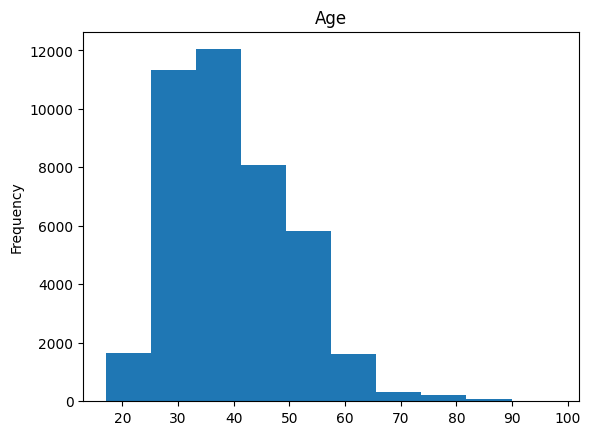

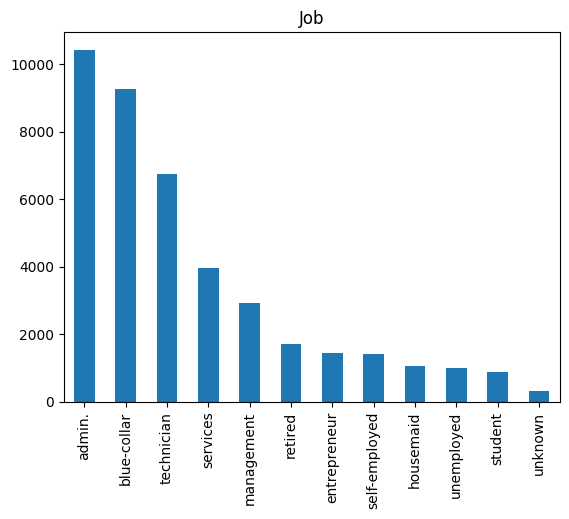

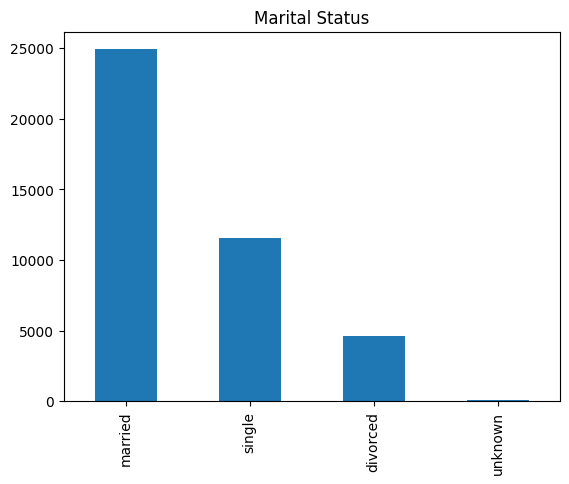

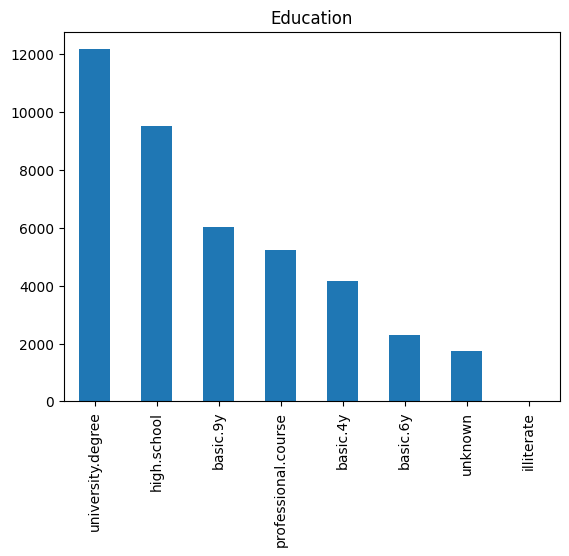

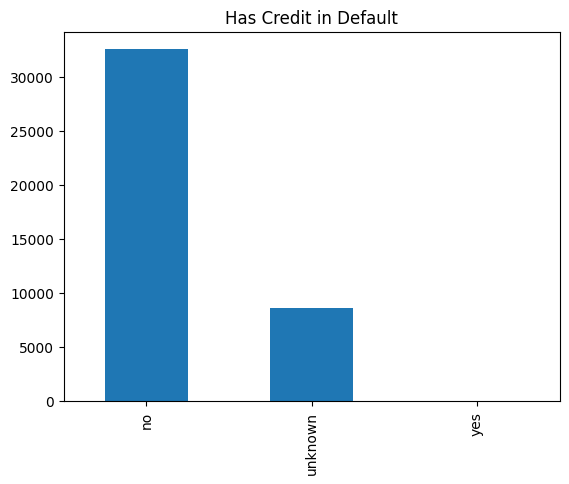

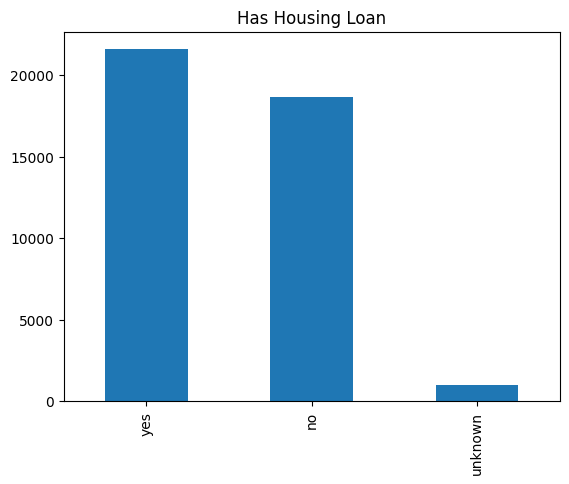

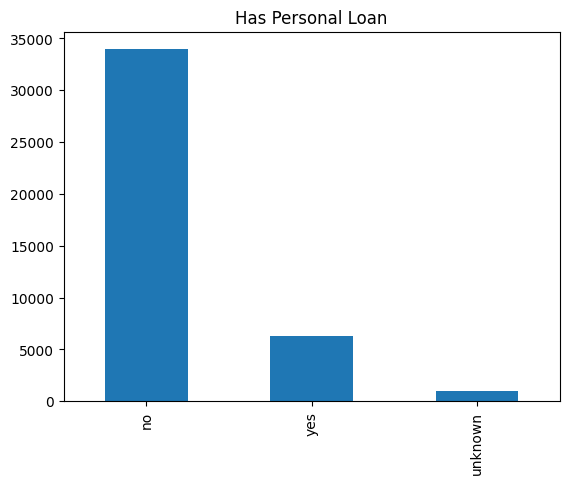

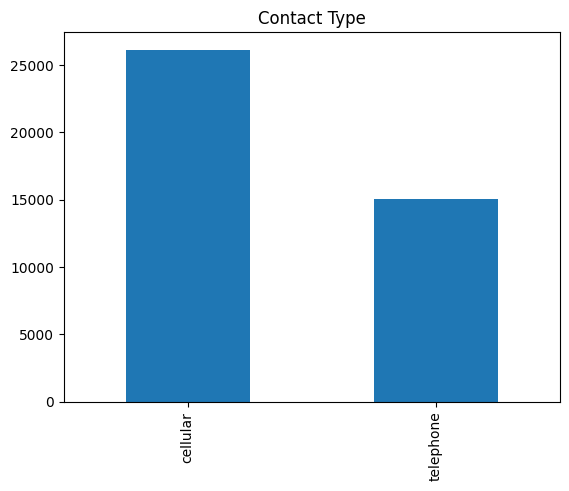

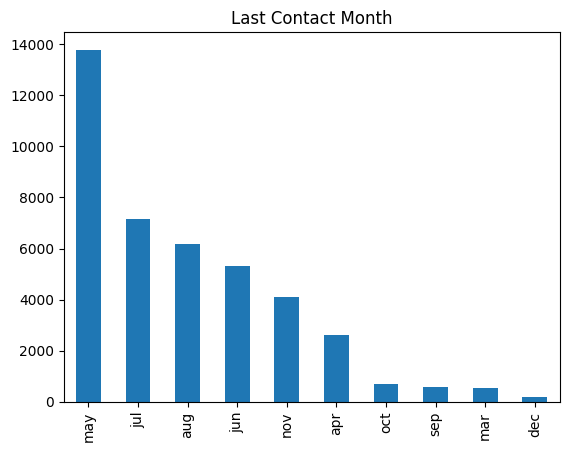

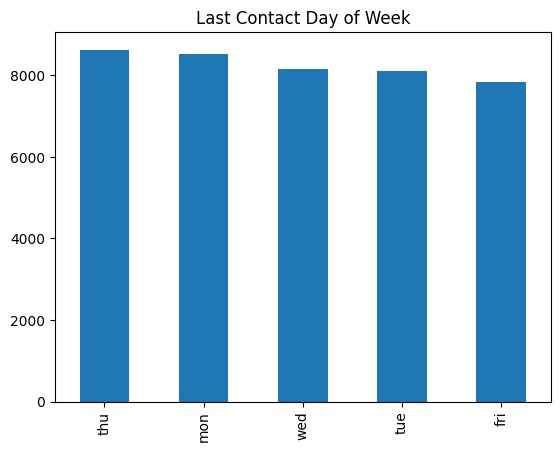

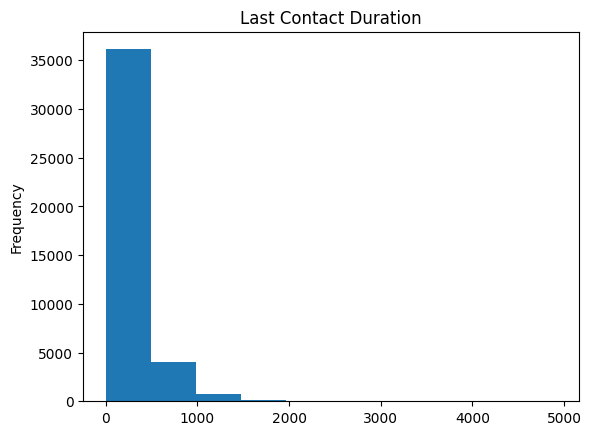

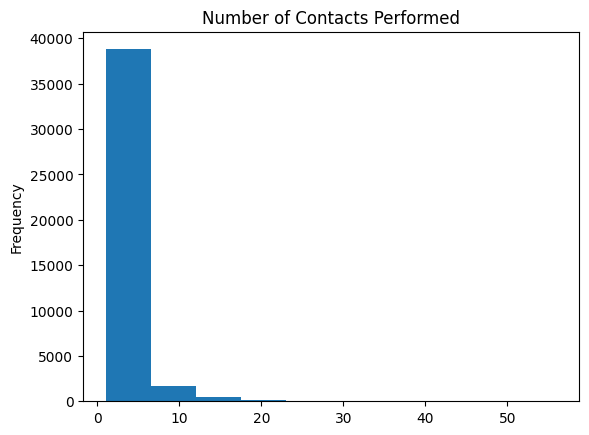

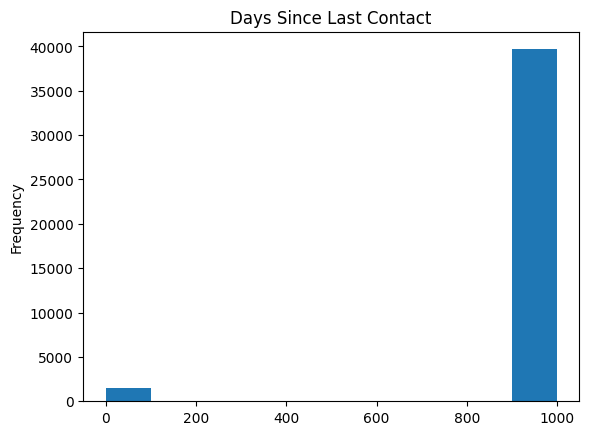

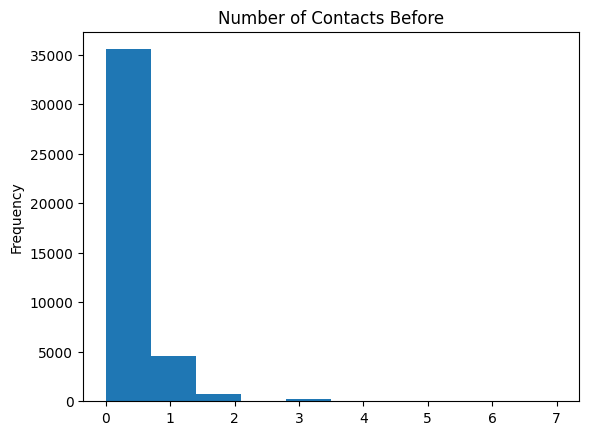

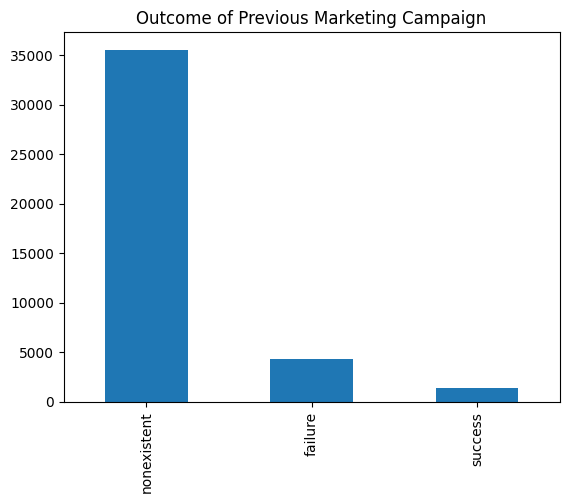

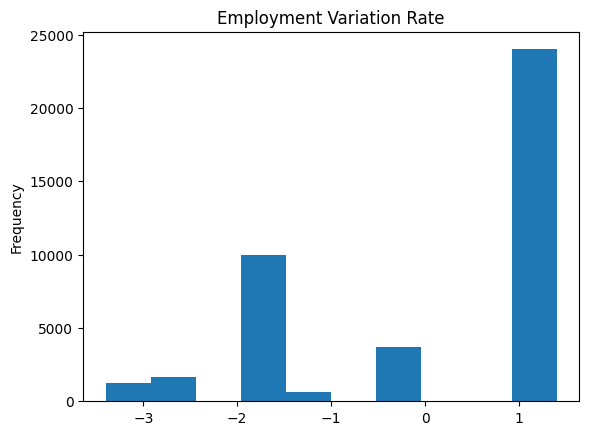

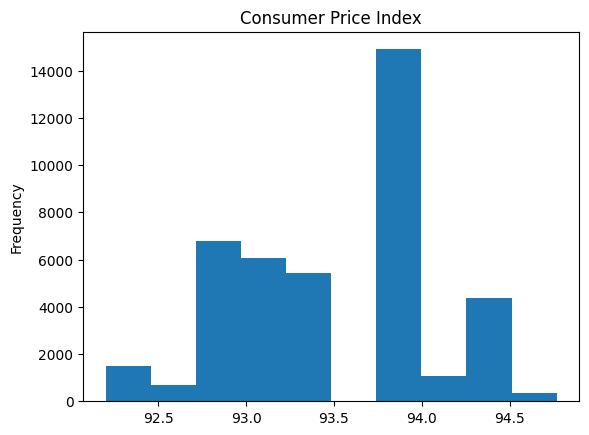

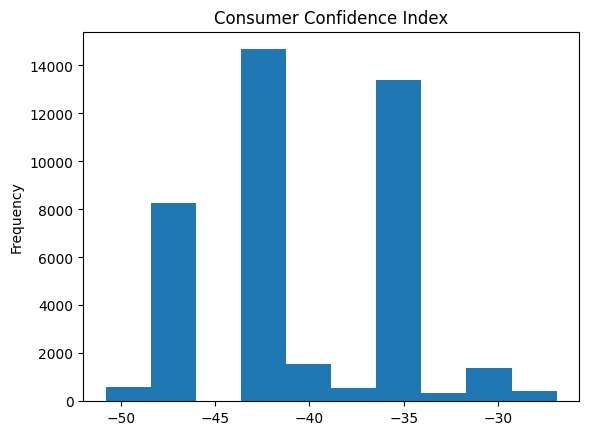

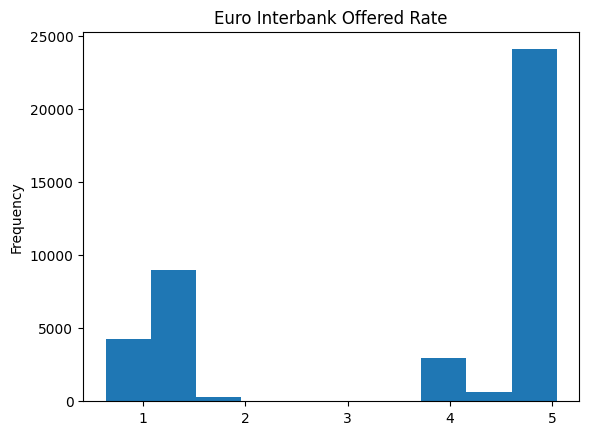

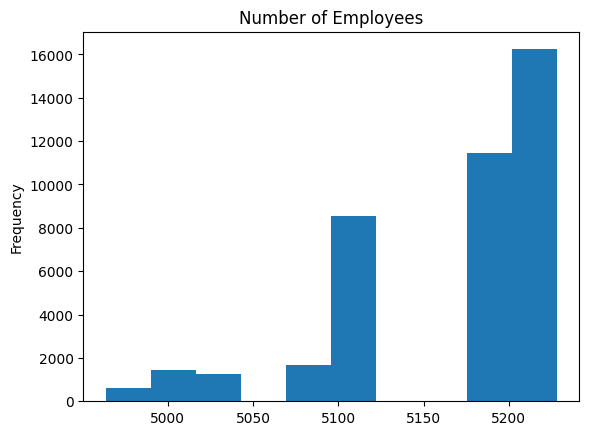

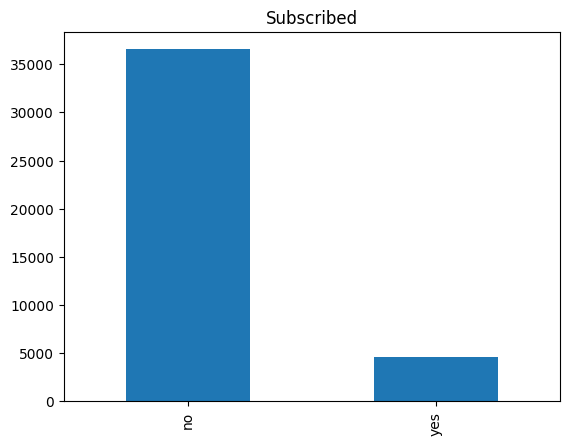

In [113]:
for i in columns:
  if df_raw[i].dtypes == 'object':
    plt.figure()
    df_raw[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
  else:
    plt.figure()
    df_raw[i].plot(kind='hist')
    plt.title(i)
    plt.show()

<Axes: xlabel='Subscribed', ylabel='count'>

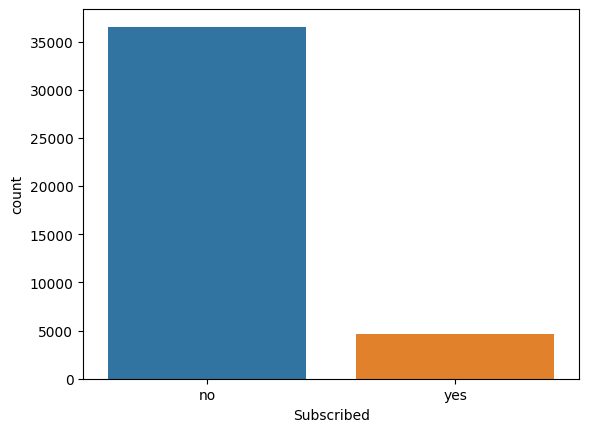

In [114]:
 sns.countplot(x='Subscribed', data=df_raw)

## Data Preprocessing

Removing Outliers

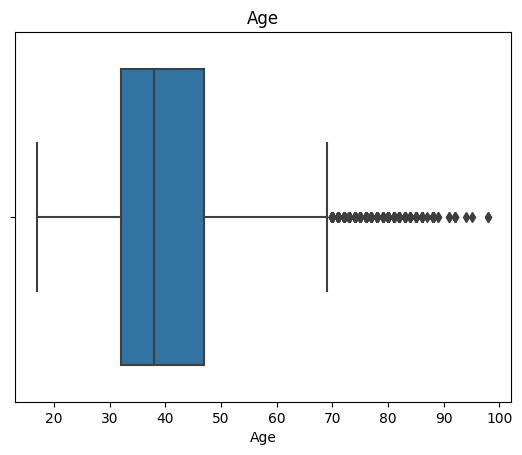

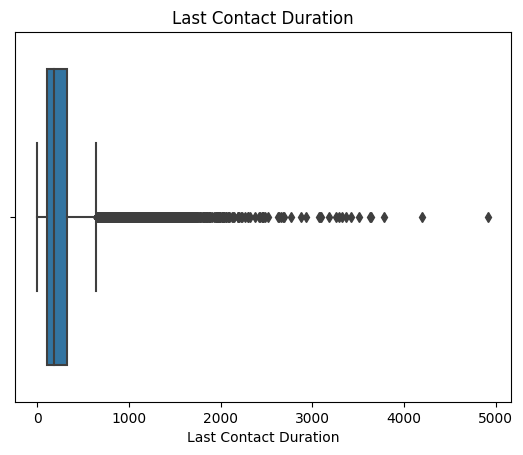

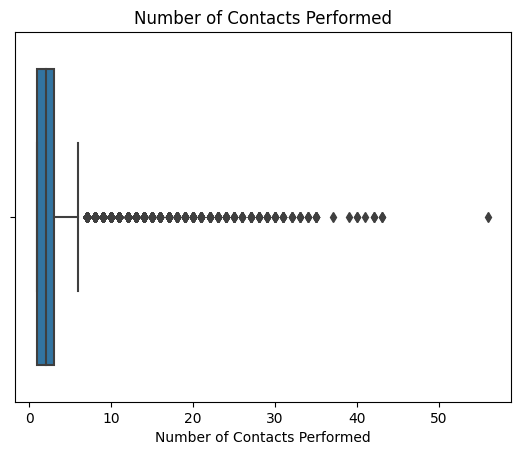

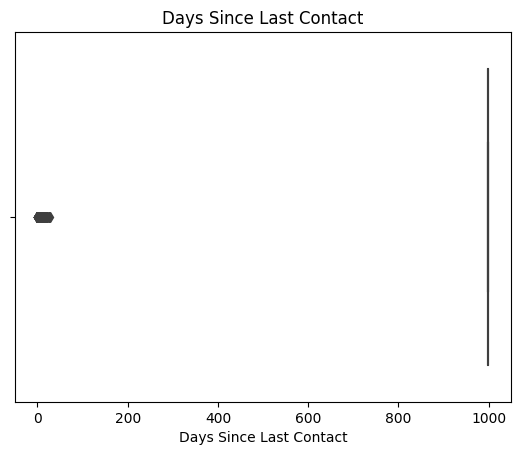

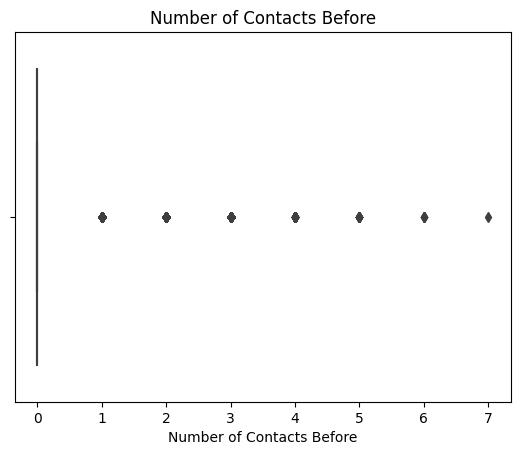

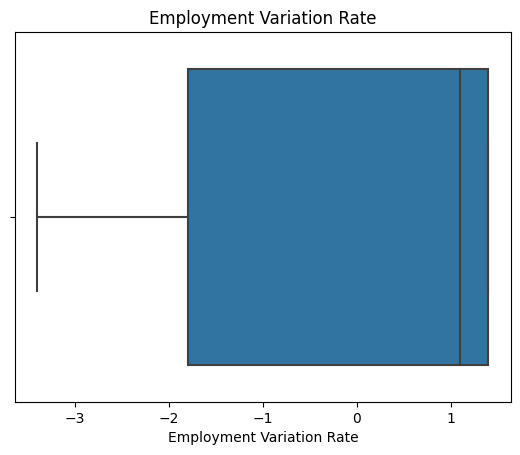

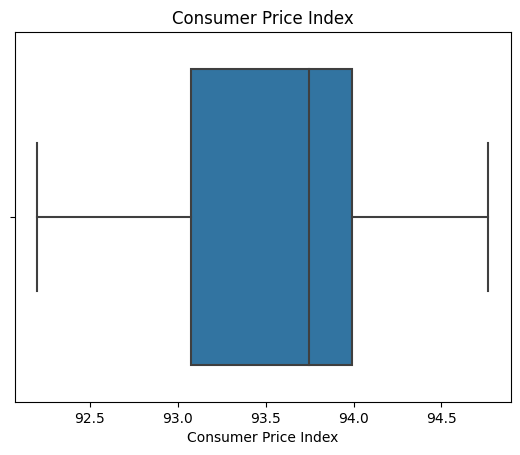

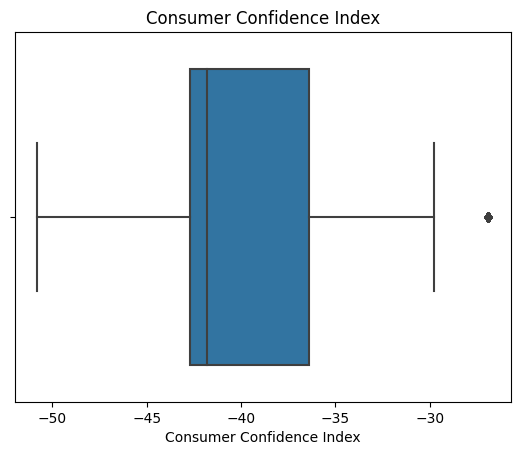

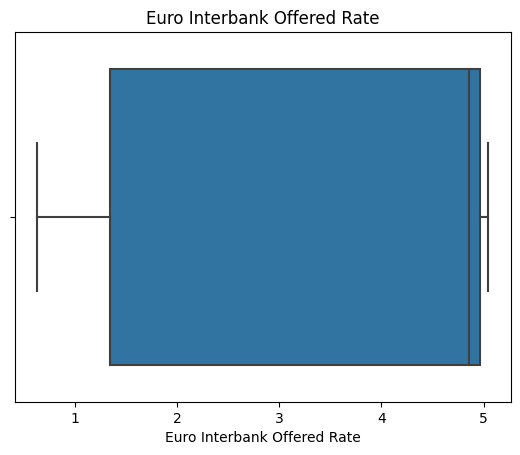

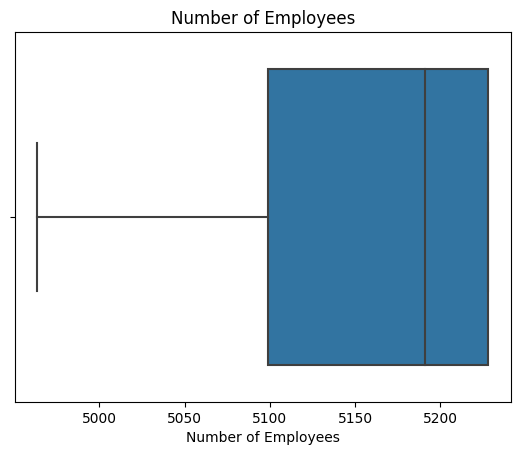

In [115]:
for column in df_raw.columns:
    if df_raw[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df_raw[column])
        plt.title(column)
        plt.show()

In [116]:
# Handle missing values using imputation
df_raw['Days Since Last Contact'].replace(999, 0, inplace=True)
print(df_raw['Days Since Last Contact'].unique())
# Remove outliers from numerical columns
df_raw = df_raw[(df_raw['Age'] > 17) & (df_raw['Age'] < 90)]
df_raw = df_raw[df_raw['Days Since Last Contact'] < 20]
df_raw = df_raw[df_raw['Last Contact Duration'] < 2000]
df_raw = df_raw[df_raw['Number of Contacts Performed'] < 30]
df_raw = df_raw[df_raw['Consumer Confidence Index'] < -30]

[ 0  6  4  3  5  1 10  7  8  9 11  2 12 13 14 15 16 21 17 18 22 25 26 19
 27 20]


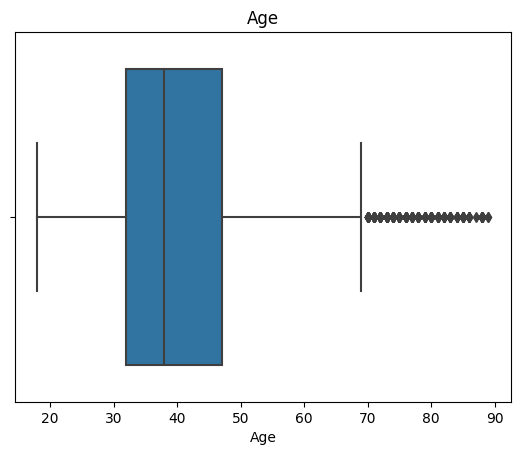

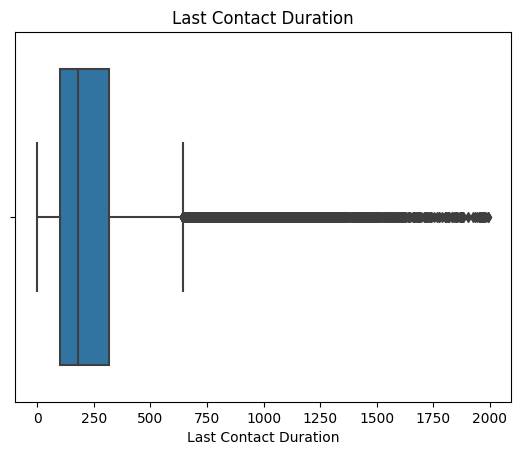

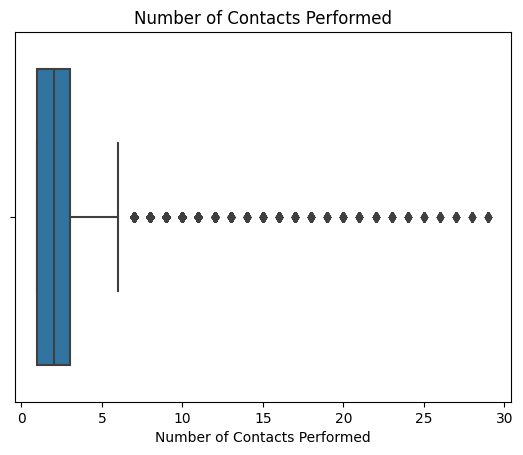

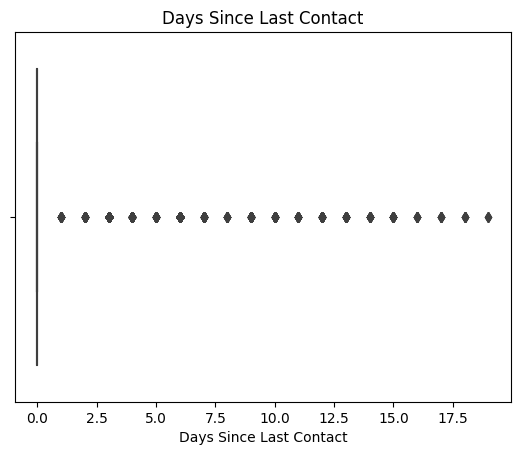

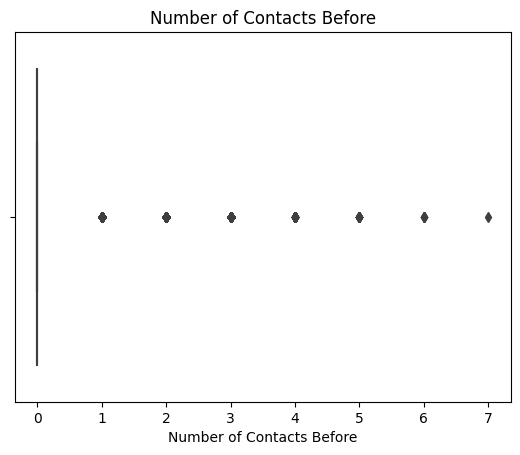

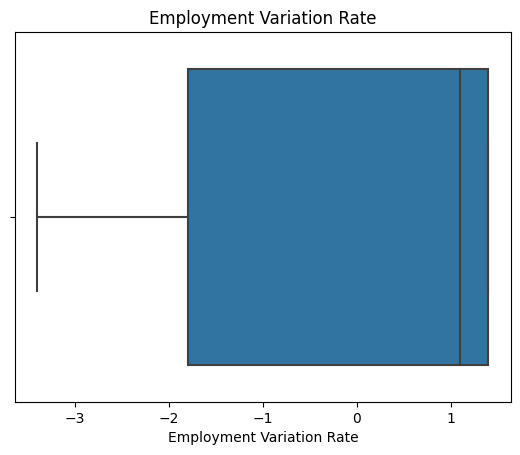

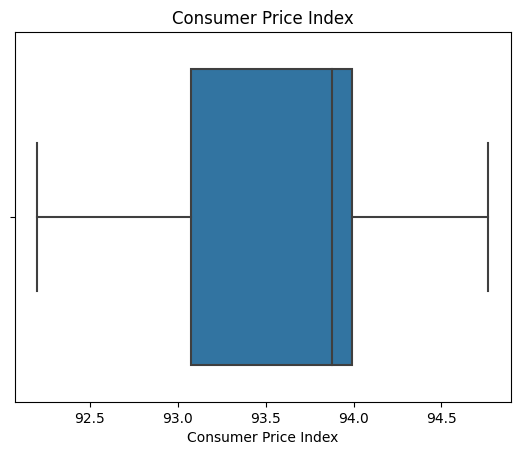

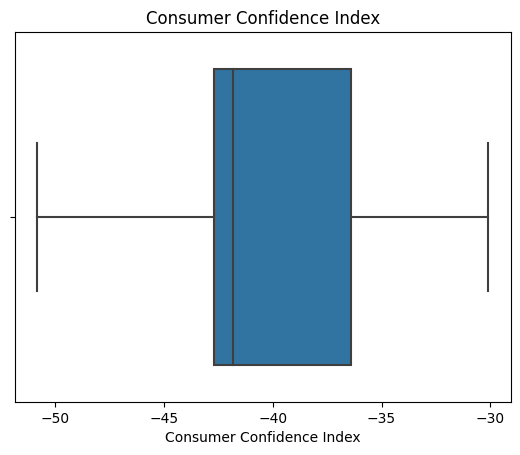

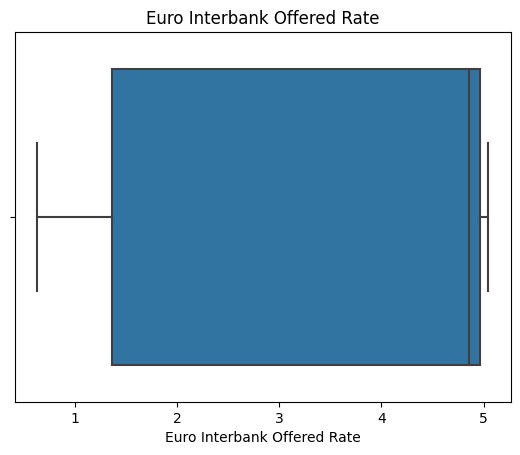

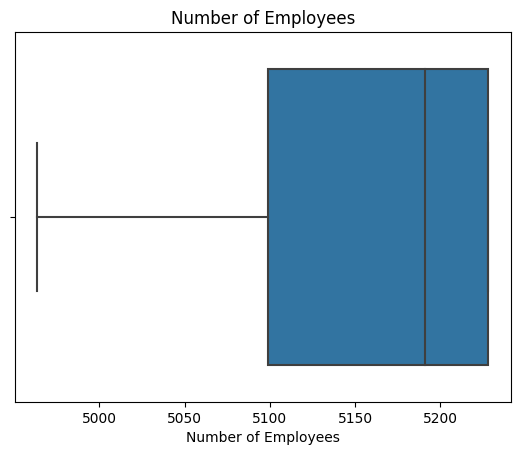

In [117]:
for column in df_raw.columns:
    if df_raw[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df_raw[column])
        plt.title(column)
        plt.show()

## Feature Engineering

In [118]:
df_raw['Age Groups'] = pd.cut(df_raw['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90], labels=['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s'])
df_raw.drop(['Age'],axis=1,inplace=True)

In [119]:
df_raw.head()

,Job,Marital Status,Education,Has Credit in Default,Has Housing Loan,Has Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,Last Contact Duration,...,Days Since Last Contact,Number of Contacts Before,Outcome of Previous Marketing Campaign,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euro Interbank Offered Rate,Number of Employees,Subscribed,Age Groups
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30s
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30s
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s


## Encoding Categorical Variables

Here we generate column names for one-hot encoded categorical variables when the get_feature_names method is not available. It first creates a list of lists of unique values for each categorical column in the dataset. It then uses a nested list comprehension to generate column names of the form "column_name_unique_value" for each unique value in each categorical column (excluding the first value, which is dropped by the OneHotEncoder with drop='first'). The resulting flattened list of strings contains the column names for the one-hot encoded variables.

In [120]:
# One-hot encode categorical variables
cat_cols = ['Job', 'Marital Status', 'Education', 'Has Credit in Default', 'Has Housing Loan', 'Has Personal Loan', 'Contact Type', 'Last Contact Month', 'Last Contact Day of Week','Outcome of Previous Marketing Campaign','Age Groups']
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(df_raw[cat_cols]).toarray()
unique_vals = [sorted(df_raw[col].unique()) for col in cat_cols]
encoded_cols_names = [f'{col}_{val}' for col, vals in zip(cat_cols, unique_vals) for val in vals[1:]]
df_raw.drop(cat_cols, axis=1, inplace=True)
data = pd.concat([df_raw, pd.DataFrame(encoded_cols, columns=encoded_cols_names)], axis=1)

In [121]:
data.head()

,Last Contact Duration,Number of Contacts Performed,Days Since Last Contact,Number of Contacts Before,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euro Interbank Offered Rate,Number of Employees,Subscribed,...,Last Contact Day of Week_wed,Outcome of Previous Marketing Campaign_nonexistent,Outcome of Previous Marketing Campaign_success,Age Groups_30s,Age Groups_40s,Age Groups_50s,Age Groups_60s,Age Groups_70s,Age Groups_80s,Age Groups_<20
0,261.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,149.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,226.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,151.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,307.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [122]:
# Encode categorical variables
le = LabelEncoder()
data['Subscribed'] = le.fit_transform(data['Subscribed'])

In [123]:
print (data.shape)
data.head()

(41179, 60)


,Last Contact Duration,Number of Contacts Performed,Days Since Last Contact,Number of Contacts Before,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euro Interbank Offered Rate,Number of Employees,Subscribed,...,Last Contact Day of Week_wed,Outcome of Previous Marketing Campaign_nonexistent,Outcome of Previous Marketing Campaign_success,Age Groups_30s,Age Groups_40s,Age Groups_50s,Age Groups_60s,Age Groups_70s,Age Groups_80s,Age Groups_<20
0,261.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,149.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,226.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,151.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,307.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

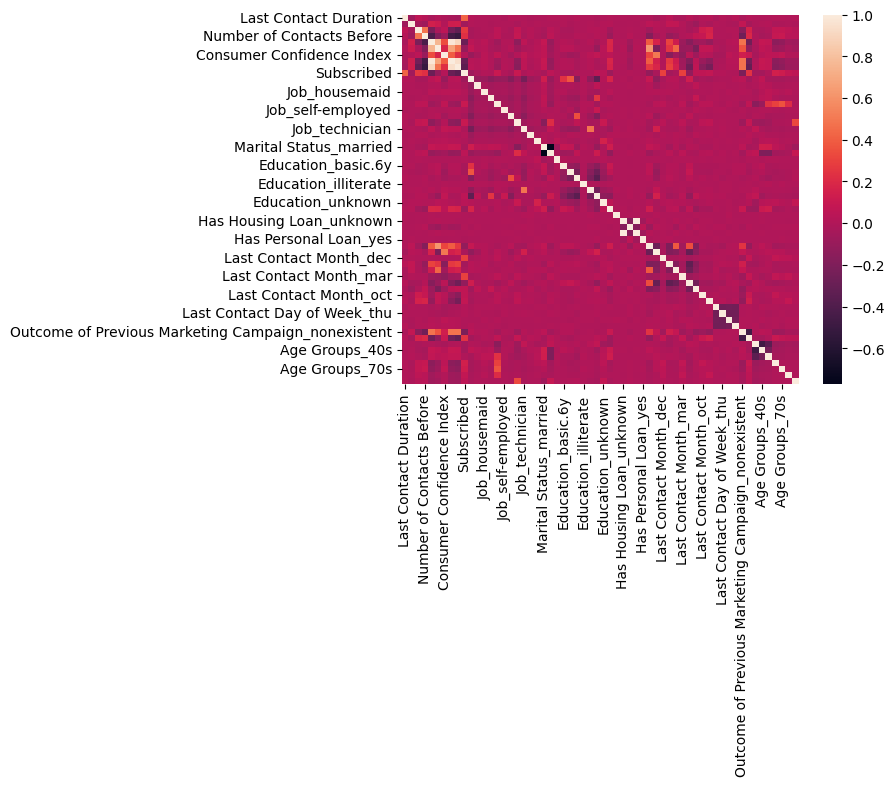

In [126]:
correlation=data.corr()
sns.heatmap(correlation)